In [2]:
import pandas as pd
import matplotlib as plt
import numpy as np
import plotly.express as px

lesson1: 
- 0 secs - video data starts
- 34 secs - sensor data starts
- 46 secs - attention intervals start

lesson2:
- 0 secs - video data starts
- 24 secs - attention interval start
- 31 secs - sensor data start
- 18:51 - pause starts
- 24:20 - pause stops

In [42]:
environment_1 = pd.read_csv("../inputs/lesson1/environment.csv", delimiter=";")
attention_feedback_1 = pd.read_csv("../inputs/lesson1/attention_feedback.csv")
faces_1 = pd.read_csv("../processed/lesson1/faces.csv")

environment_2 = pd.read_csv("../inputs/lesson2/environment.csv", delimiter=";")
attention_feedback_2 = pd.read_csv("../inputs/lesson2/attention_feedback.csv")
faces_2 = pd.read_csv("../processed/lesson2/faces.csv")

In [43]:
#add timing indicator
environment_1.insert(0, "index", range(0,len(environment_1)))
environment_2.insert(0, "index", range(0,len(environment_2)))

environment_1["seconds"] = environment_1["index"] * 15 + 34
environment_2["seconds"] = environment_2["index"] * 15 + 31

attention_feedback_1 += 46
attention_feedback_2 += 24

faces_1["seconds"] = faces_1["seconds"].astype("int")
faces_2["seconds"] = faces_2["seconds"].astype("int")

lesson1 = pd.merge(faces_1, environment_1, on="seconds", how="left")
lesson2 = pd.merge(faces_2, environment_2, on="seconds", how="left")

In [44]:
luuk = attention_feedback_1.iloc[:,:1]
jan = attention_feedback_1.iloc[:,1:2]
mayank = attention_feedback_1.iloc[:,2:3]
carlos = attention_feedback_1.iloc[:,3:4]
gregoire = attention_feedback_2

luuk.dropna(inplace=True)
jan.dropna(inplace=True)
carlos.dropna(inplace=True)

luuk["luuk_indicator"] = 1
jan["jan_indicator"] = 1
mayank["mayank_indicator"] = 1
carlos["carlos_indicator"] = 1
gregoire["gregoire_indicator"] = 1

luuk.rename(columns={"Luuk": "seconds"}, inplace=True)
jan.rename(columns={"Jan": "seconds"}, inplace=True)
mayank.rename(columns={"Mayank": "seconds"}, inplace=True)
carlos.rename(columns={"Carlos": "seconds"}, inplace=True)
gregoire.rename(columns={"gregoire": "seconds"}, inplace=True)

luuk["seconds"] = luuk["seconds"].astype("int")
jan["seconds"] = jan["seconds"].astype("int")
mayank["seconds"] = mayank["seconds"].astype("int")
carlos["seconds"] = carlos["seconds"].astype("int")
gregoire["seconds"] = gregoire["seconds"].astype("int")

lesson1 = pd.merge(lesson1, luuk, on="seconds", how="left")
lesson1 = pd.merge(lesson1, jan, on="seconds", how="left")
lesson1 = pd.merge(lesson1, mayank, on="seconds", how="left")
lesson1 = pd.merge(lesson1, carlos, on="seconds", how="left")

lesson2 = pd.merge(lesson2, gregoire, on="seconds", how="left")


lesson1["luuk_indicator"]   = lesson1["luuk_indicator"].fillna(0)
lesson1["jan_indicator"]    = lesson1["jan_indicator"].fillna(0)
lesson1["mayank_indicator"] = lesson1["mayank_indicator"].fillna(0)
lesson1["carlos_indicator"] = lesson1["carlos_indicator"].fillna(0)
lesson2["gregoire_indicator"] = lesson2["gregoire_indicator"].fillna(0)

/var/folders/fl/z36dzxyn0ql9_2v5cpk99q_c0000gn/T/ipykernel_46285/1671149621.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mayank["mayank_indicator"] = 1
/var/folders/fl/z36dzxyn0ql9_2v5cpk99q_c0000gn/T/ipykernel_46285/1671149621.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mayank.rename(columns={"Mayank": "seconds"}, inplace=True)
/var/folders/fl/z36dzxyn0ql9_2v5cpk99q_c0000gn/T/ipykernel_46285/1671149621.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

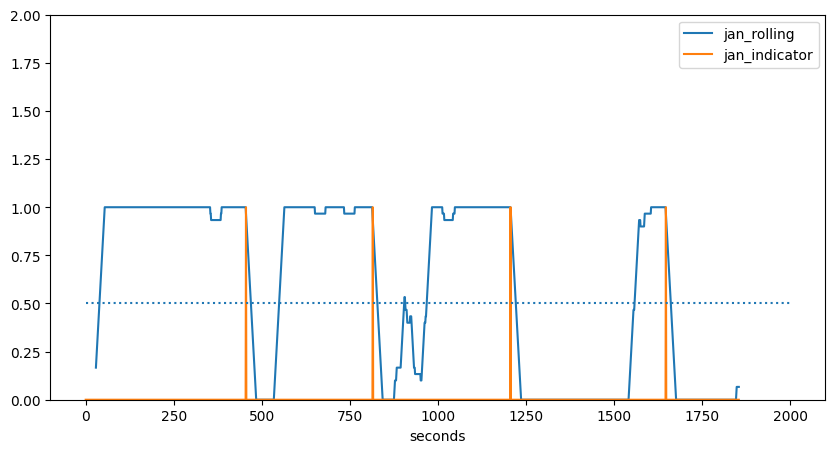

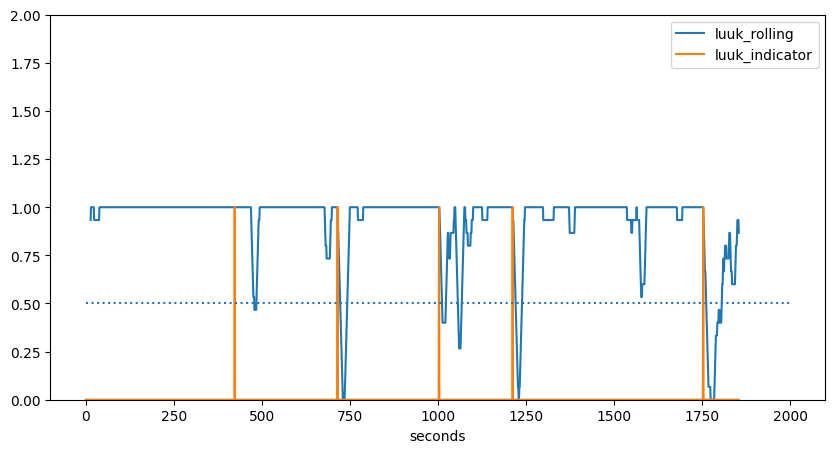

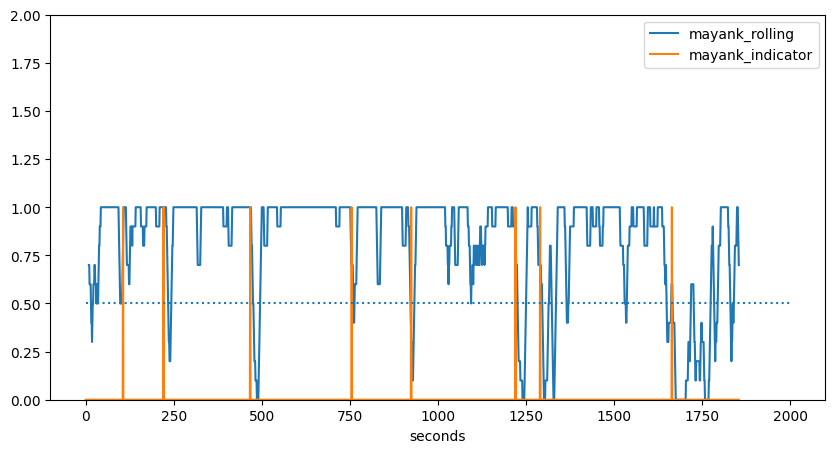

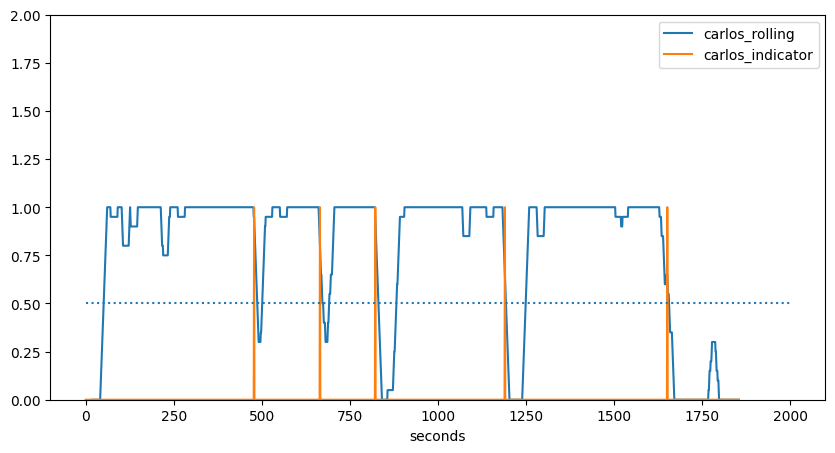

In [45]:
lesson1["jan_rolling"]      = lesson1["jan"].rolling(30).mean()
lesson1["luuk_rolling"]     = lesson1["luuk"].rolling(15).mean()
lesson1["mayank_rolling"]   = lesson1["mayank"].rolling(10).mean()
lesson1["carlos_rolling"]   = lesson1["carlos"].rolling(20).mean()

lesson1.plot(x="seconds",y=["jan_rolling", "jan_indicator"],kind="line", ylim=(0,2), figsize=(10,5)).hlines(0.5, 0, 2000, linestyles="dotted")
lesson1.plot(x="seconds",y=["luuk_rolling", "luuk_indicator"],kind="line", ylim=(0,2), figsize=(10,5)).hlines(0.5, 0, 2000, linestyles="dotted")
lesson1.plot(x="seconds",y=["mayank_rolling", "mayank_indicator"],kind="line", ylim=(0,2), figsize=(10,5)).hlines(0.5, 0, 2000, linestyles="dotted")
lesson1.plot(x="seconds",y=["carlos_rolling", "carlos_indicator"],kind="line", ylim=(0,2), figsize=(10,5)).hlines(0.5, 0, 2000, linestyles="dotted")


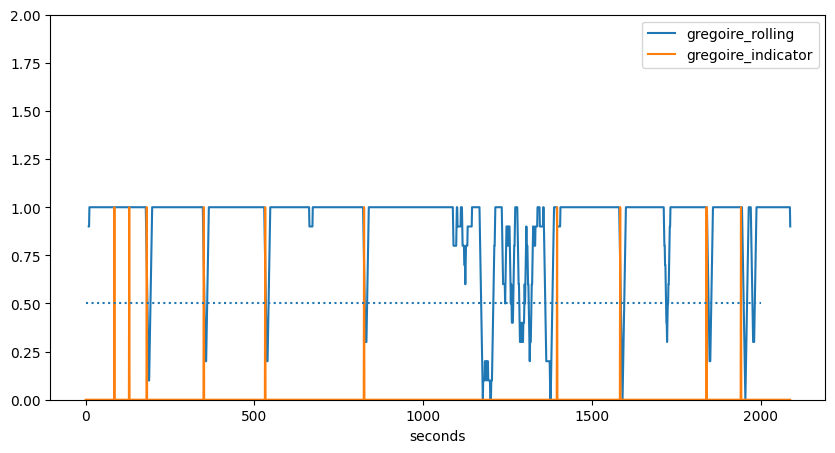

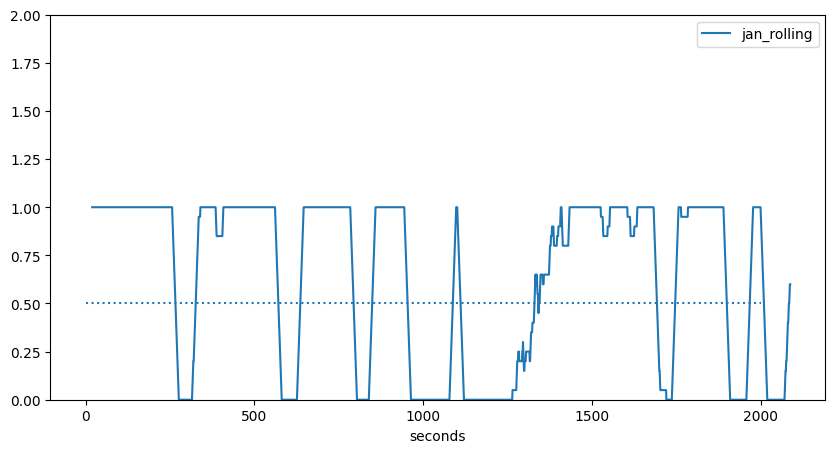

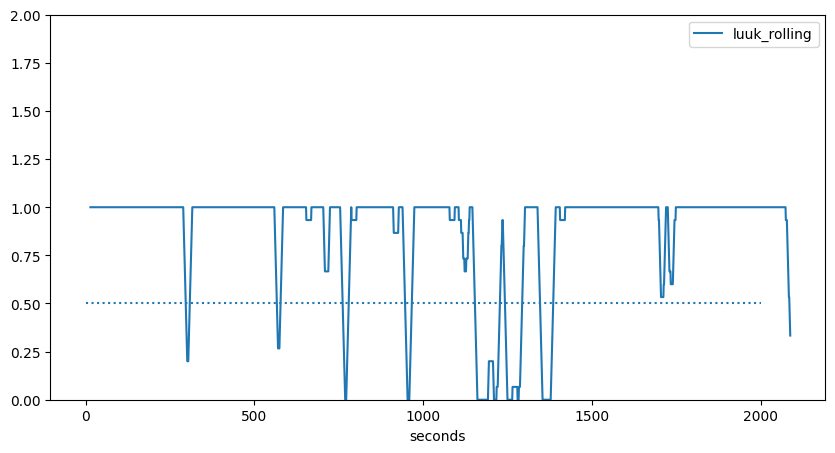

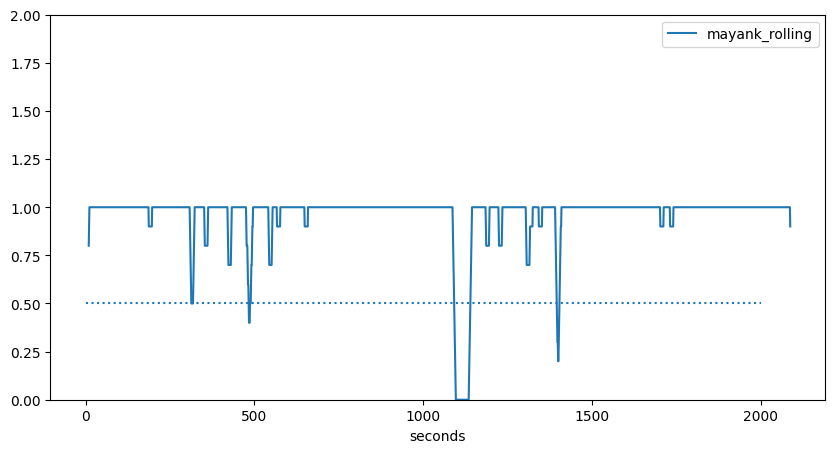

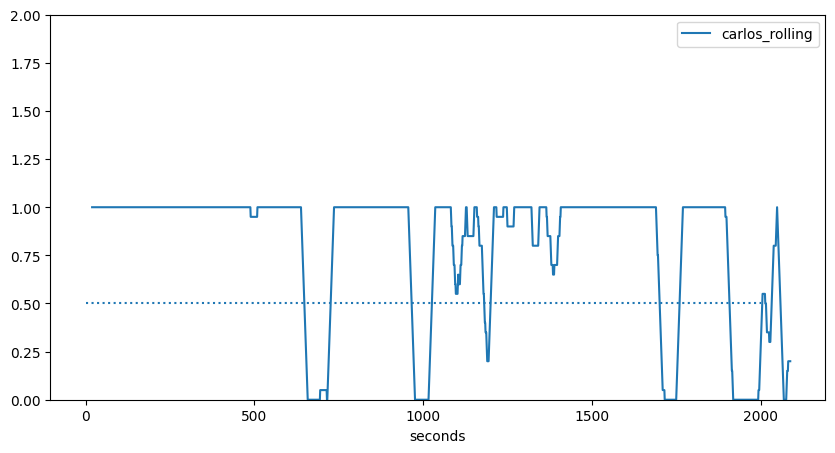

In [46]:
lesson2["gregoire_rolling"] = lesson2["gregoire"].rolling(10).mean()
lesson2["jan_rolling"]      = lesson2["jan"].rolling(20).mean()
lesson2["luuk_rolling"]     = lesson2["luuk"].rolling(15).mean()
lesson2["mayank_rolling"]   = lesson2["mayank"].rolling(10).mean()
lesson2["carlos_rolling"]   = lesson2["carlos"].rolling(20).mean()

lesson2.plot(x="seconds",y=["gregoire_rolling", "gregoire_indicator"],kind="line", ylim=(0,2), figsize=(10,5)).hlines(0.5, 0, 2000, linestyles="dotted")
lesson2.plot(x="seconds",y=["jan_rolling"],kind="line", ylim=(0,2), figsize=(10,5)).hlines(0.5, 0, 2000, linestyles="dotted")
lesson2.plot(x="seconds",y=["luuk_rolling"],kind="line", ylim=(0,2), figsize=(10,5)).hlines(0.5, 0, 2000, linestyles="dotted")
lesson2.plot(x="seconds",y=["mayank_rolling"],kind="line", ylim=(0,2), figsize=(10,5)).hlines(0.5, 0, 2000, linestyles="dotted")
lesson2.plot(x="seconds",y=["carlos_rolling"],kind="line", ylim=(0,2), figsize=(10,5)).hlines(0.5, 0, 2000, linestyles="dotted")

In [47]:
lesson1["luuk_attention_break"]     = lesson1["luuk_rolling"] <= 0.5
lesson1["jan_attention_break"]      = lesson1["jan_rolling"] <= 0.5
lesson1["mayank_attention_break"]   = lesson1["mayank_rolling"] <= 0.5
lesson1["carlos_attention_break"]   = lesson1["carlos_rolling"] <= 0.5

lesson2["luuk_attention_break"]     = lesson2["luuk_rolling"] <= 0.5
lesson2["jan_attention_break"]      = lesson2["jan_rolling"] <= 0.5
lesson2["mayank_attention_break"]   = lesson2["mayank_rolling"] <= 0.5
lesson2["carlos_attention_break"]   = lesson2["carlos_rolling"] <= 0.5
lesson2["gregoire_attention_break"] = lesson2["gregoire_rolling"] <= 0.5

In [51]:
lesson1["minute"] = lesson1["seconds"] / 60
lesson1["minute"] = lesson1["minute"].apply(np.floor)

lesson2["minute"] = lesson2["seconds"] / 60
lesson2["minute"] = lesson2["minute"].apply(np.floor)

lesson1_minute = lesson1[["minute", "jan_attention_break", "luuk_attention_break", "mayank_attention_break", "carlos_attention_break"]]
lesson2_minute = lesson2[["minute", "jan_attention_break", "luuk_attention_break", "mayank_attention_break", "carlos_attention_break", "gregoire_attention_break"]]

lesson1_minute["jan_attention_break"] = lesson1_minute["jan_attention_break"].astype(int)
lesson1_minute["luuk_attention_break"] = lesson1_minute["luuk_attention_break"].astype(int)
lesson1_minute["carlos_attention_break"] = lesson1_minute["carlos_attention_break"].astype(int)
lesson1_minute["mayank_attention_break"] = lesson1_minute["mayank_attention_break"].astype(int)

lesson2_minute["jan_attention_break"] = lesson2_minute["jan_attention_break"].astype(int)
lesson2_minute["luuk_attention_break"] = lesson2_minute["luuk_attention_break"].astype(int)
lesson2_minute["carlos_attention_break"] = lesson2_minute["carlos_attention_break"].astype(int)
lesson2_minute["mayank_attention_break"] = lesson2_minute["mayank_attention_break"].astype(int)
lesson2_minute["gregoire_attention_break"] = lesson2_minute["gregoire_attention_break"].astype(int)

/var/folders/fl/z36dzxyn0ql9_2v5cpk99q_c0000gn/T/ipykernel_46285/439095881.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lesson1_minute["jan_attention_break"] = lesson1_minute["jan_attention_break"].astype(int)
/var/folders/fl/z36dzxyn0ql9_2v5cpk99q_c0000gn/T/ipykernel_46285/439095881.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lesson1_minute["luuk_attention_break"] = lesson1_minute["luuk_attention_break"].astype(int)
/var/folders/fl/z36dzxyn0ql9_2v5cpk99q_c0000gn/T/ipykernel_46285/439095881

In [52]:
lesson1_minute_group = lesson1_minute.groupby("minute").max()
lesson2_minute_group = lesson2_minute.groupby("minute").max()

In [53]:
lesson1_minute_group["sum"] = lesson1_minute_group["jan_attention_break"] + lesson1_minute_group["carlos_attention_break"] + lesson1_minute_group["luuk_attention_break"] + lesson1_minute_group["mayank_attention_break"]
lesson1_minute_group = lesson1_minute_group.iloc[2:]
lesson2_minute_group["sum"] = lesson2_minute_group["jan_attention_break"] + lesson2_minute_group["carlos_attention_break"] + lesson2_minute_group["luuk_attention_break"] + lesson2_minute_group["mayank_attention_break"] + lesson2_minute_group["gregoire_attention_break"]

/var/folders/fl/z36dzxyn0ql9_2v5cpk99q_c0000gn/T/ipykernel_46285/574394888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lesson1_minute_group["rolling"] = lesson1_minute_group["sum"].rolling(4, min_periods=1).mean()
/var/folders/fl/z36dzxyn0ql9_2v5cpk99q_c0000gn/T/ipykernel_46285/574394888.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lesson1_minute_group["rolling2"] = lesson1_minute_group["rolling"].rolling(4, min_periods=1).mean()


<AxesSubplot: xlabel='minute'>

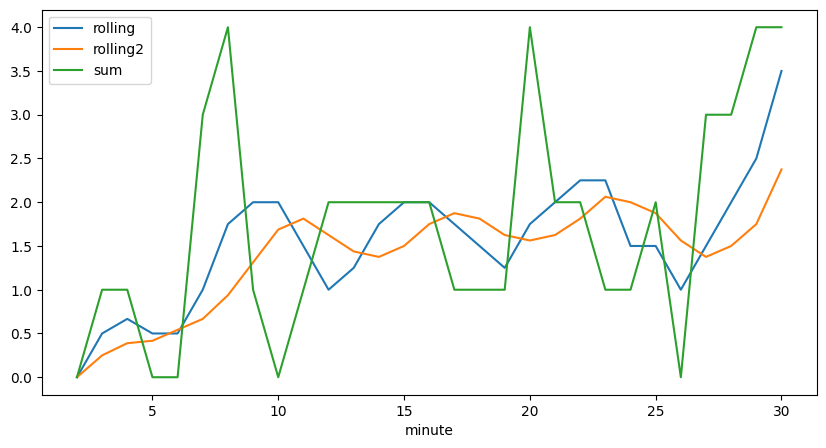

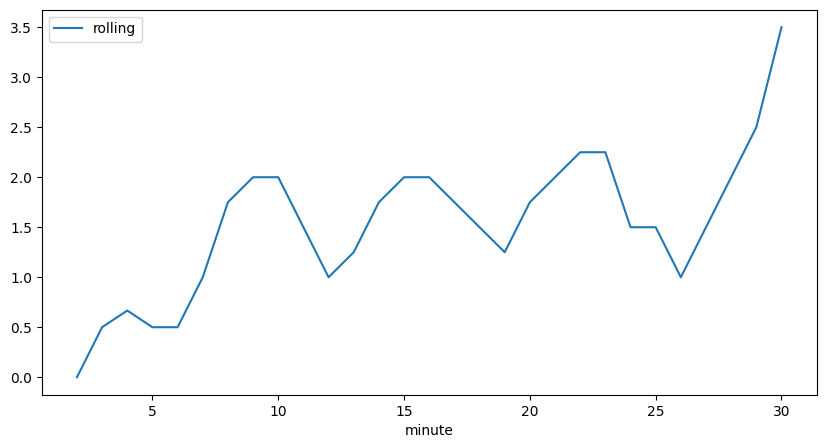

In [60]:
lesson1_minute_group["rolling"] = lesson1_minute_group["sum"].rolling(4, min_periods=1).mean()
lesson1_minute_group["rolling2"] = lesson1_minute_group["rolling"].rolling(4, min_periods=1).mean()
lesson1_minute_group.plot(y=["rolling","rolling2", "sum"], figsize=(10,5))
lesson1_minute_group.plot(y="rolling", figsize=(10,5))

<AxesSubplot: xlabel='minute'>

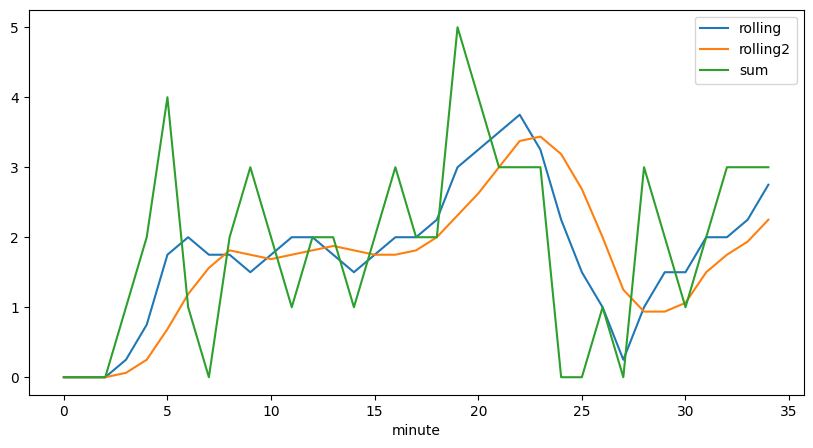

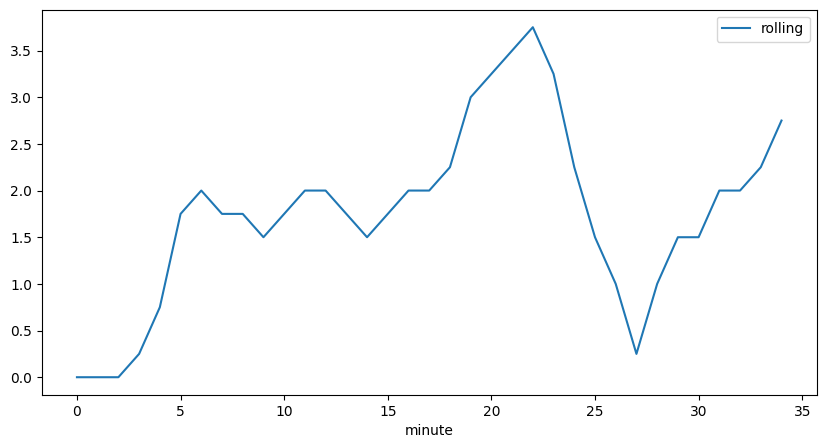

In [61]:
lesson2_minute_group["rolling"] = lesson2_minute_group["sum"].rolling(4, min_periods=1).mean()
lesson2_minute_group["rolling2"] = lesson2_minute_group["rolling"].rolling(4, min_periods=1).mean()
lesson2_minute_group.plot(y=["rolling","rolling2", "sum"], figsize=(10,5))
lesson2_minute_group.plot(y="rolling", figsize=(10,5))

In [65]:
lesson1_minute_group.to_csv("lesson1_data.csv")
lesson2_minute_group.to_csv("lesson2_data.csv")

In [ ]:
## Machine learning ##

In [47]:
# date time and make data numeric
sensor_data["Date and time"] = pd.to_datetime(sensor_data["Date and time"], format="%d-%m-%Y %H:%M:%S")
sensor_data.set_index("Date and time", inplace=True)
sensor_data.iloc[:, 1:] = sensor_data.iloc[:, 1:].astype(str)
sensor_data.iloc[:, 1:] = sensor_data.iloc[:, 1:].apply(lambda x: x.str.replace(",", "."))
sensor_data.iloc[:, 1:] = sensor_data.iloc[:, 1:].astype(float)

In [113]:
df_resampled = sensor_data.resample("60S").mean()
df_resampled = df_resampled.rename(columns={col: col.replace(' ', '_') for col in df_resampled.columns})

df_resampled['minute'] = np.arange(0.0, 30.5, 1)
merged_df = df_resampled.reset_index().merge(test, on='minute')
merged_df.head()

,Date and time,index,_Temperature_°C,_RH_%,_DewPoint_°C,_CO2_ppm,seconds,minute,jan_attention_break,luuk_attention_break,mayank_attention_break,carlos_attention_break,sum
0,2023-03-09 15:17:00,1.5,21.2330,26.53350,1.28500,537.00,56.5,0.0,1,0,1,1,3
1,2023-03-09 15:18:00,5.5,21.2585,26.41775,1.24575,537.00,116.5,1.0,0,0,1,0,1
2,2023-03-09 15:19:00,9.5,21.2685,26.33700,1.20975,534.75,176.5,2.0,0,0,0,0,0
3,2023-03-09 15:20:00,13.5,21.2635,26.31700,1.19725,534.00,236.5,3.0,0,0,1,0,1
4,2023-03-09 15:21:00,17.5,21.2660,26.28325,1.17725,528.75,296.5,4.0,0,0,1,0,1


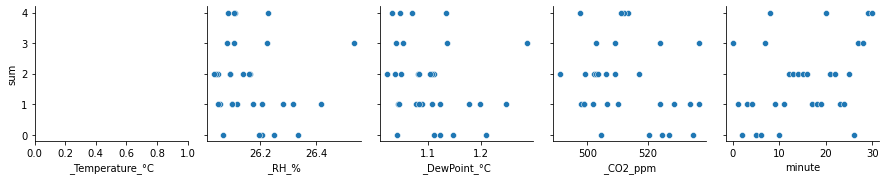

In [125]:
import seaborn as sns
sns.pairplot(merged_df, y_vars=['sum'], x_vars=['_Temperature_°C', '_RH_%', '_DewPoint_°C', '_CO2_ppm', 'minute'])

In [119]:
#correlation temperature (doesnt work in the graph above)
fig = px.scatter(merged_df, x="_Temperature_°C", y="sum")
fig.show()

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = np.array(merged_df['_Temperature_°C']).reshape(-1, 1)
y = merged_df['sum']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

Mean squared error: 1.364716221639399
